In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart
import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
 reshape (Reshape)           (None, 3, 4)              0         
                                                                 
Total params: 31084 (121.42 KB)
Trainable params: 31084

---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data()

x_train = train['x']
y_train = train['y']
x_dates_train = train['x_dates']
y_dates_train = train['y_dates']

x_test = test['x']
y_test = test['y']
x_dates_test = test['x_dates']
y_dates_test = test['y_dates']

x_predict = predict['x']
y_predict = predict['y']
x_dates_predict = predict['x_dates']
y_dates_predict = predict['y_dates']

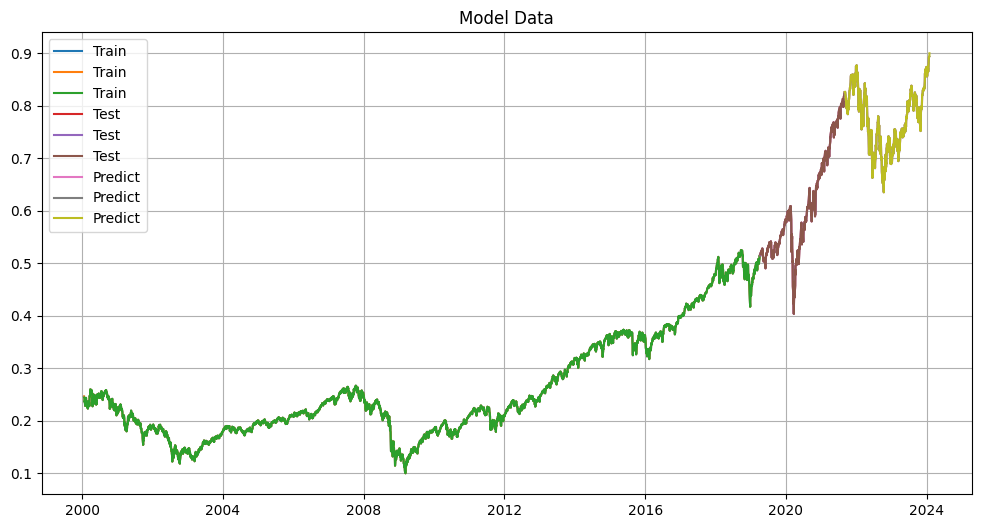

In [5]:
plt = config_chart('Model Data')
plt.plot(y_dates_train, y_train[:, :, 0])
plt.plot(y_dates_test, y_test[:, :, 0])
plt.plot(y_dates_predict, y_predict[:, :, 0])
plt.legend(['Train', 'Train', 'Train',  'Test', 'Test', 'Test', 'Predict', 'Predict', 'Predict'])

In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)

Epoch 1/100


152/152 - 4s - loss: 0.0252 - mean_absolute_error: 0.1077 - 4s/epoch - 24ms/step
Epoch 2/100
152/152 - 1s - loss: 3.0325e-04 - mean_absolute_error: 0.0119 - 688ms/epoch - 5ms/step
Epoch 3/100
152/152 - 1s - loss: 6.7341e-05 - mean_absolute_error: 0.0062 - 695ms/epoch - 5ms/step
Epoch 4/100
152/152 - 1s - loss: 5.9284e-05 - mean_absolute_error: 0.0058 - 685ms/epoch - 5ms/step
Epoch 5/100
152/152 - 1s - loss: 5.5689e-05 - mean_absolute_error: 0.0056 - 826ms/epoch - 5ms/step
Epoch 6/100
152/152 - 1s - loss: 4.9602e-05 - mean_absolute_error: 0.0052 - 735ms/epoch - 5ms/step
Epoch 7/100
152/152 - 1s - loss: 4.6863e-05 - mean_absolute_error: 0.0051 - 723ms/epoch - 5ms/step
Epoch 8/100
152/152 - 1s - loss: 4.9844e-05 - mean_absolute_error: 0.0052 - 715ms/epoch - 5ms/step
Epoch 9/100
152/152 - 1s - loss: 4.8350e-05 - mean_absolute_error: 0.0052 - 711ms/epoch - 5ms/step
Epoch 10/100
152/152 - 1s - loss: 5.2181e-05 - mean_absolute_error: 0.0054 - 700ms/epoch - 5ms/step
Epoch 11/100


Text(0, 0.5, 'Value')

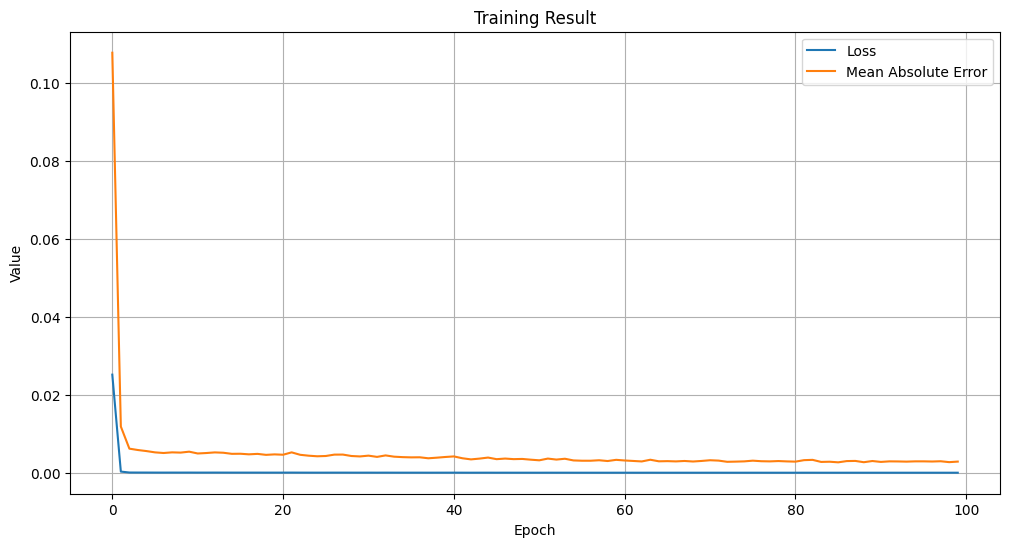

In [7]:
plt = config_chart('Training Result')
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Value')

In [8]:
model.save('./models/lstm_v2/lstm_model_v2')
model = tf.keras.models.load_model('./models/lstm_v2/lstm_model_v2')

INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


In [11]:
predictions = model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


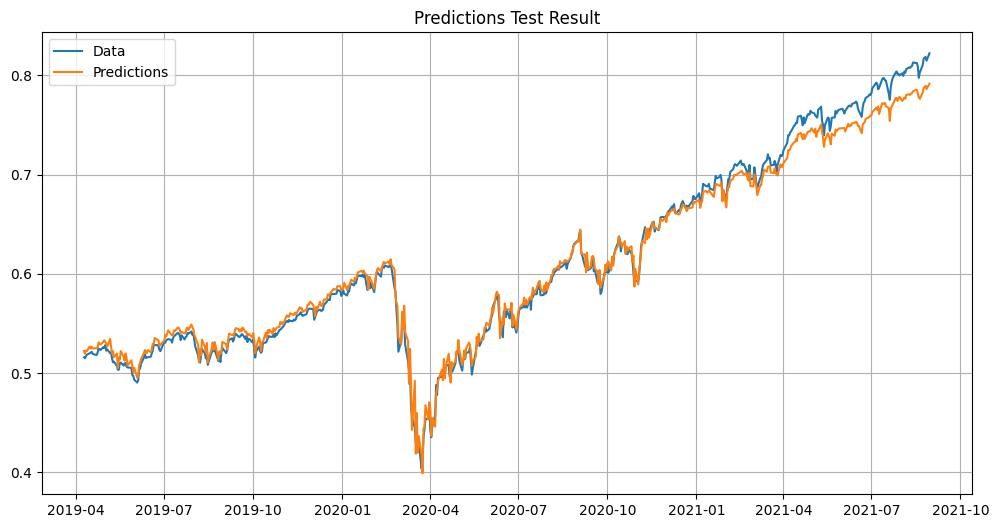

In [12]:
plt = config_chart('Predictions Test Result')
plt.plot(y_dates_test[:, 0], y_test[:, 0, 0])
plt.plot(y_dates_test[:, 0], predictions[:, 0, 0])
plt.legend(['Data', 'Predictions'])

In [17]:
predictions = model.predict(x_predict)

19/19 [==============================] - 0s 2ms/step


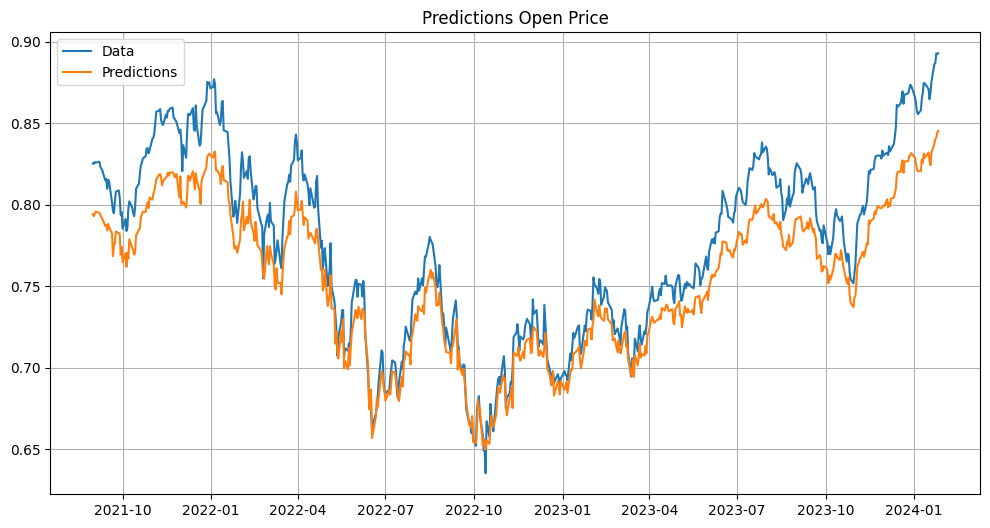

In [18]:
plt = config_chart('Predictions Open Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 0])
plt.legend(['Data', 'Predictions'])

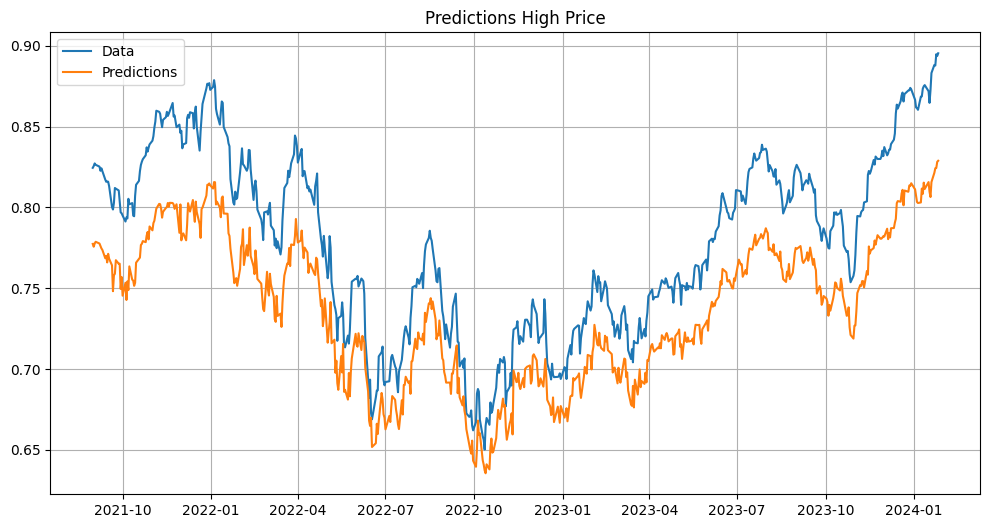

In [19]:
plt = config_chart('Predictions High Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 1])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 1])
plt.legend(['Data', 'Predictions'])

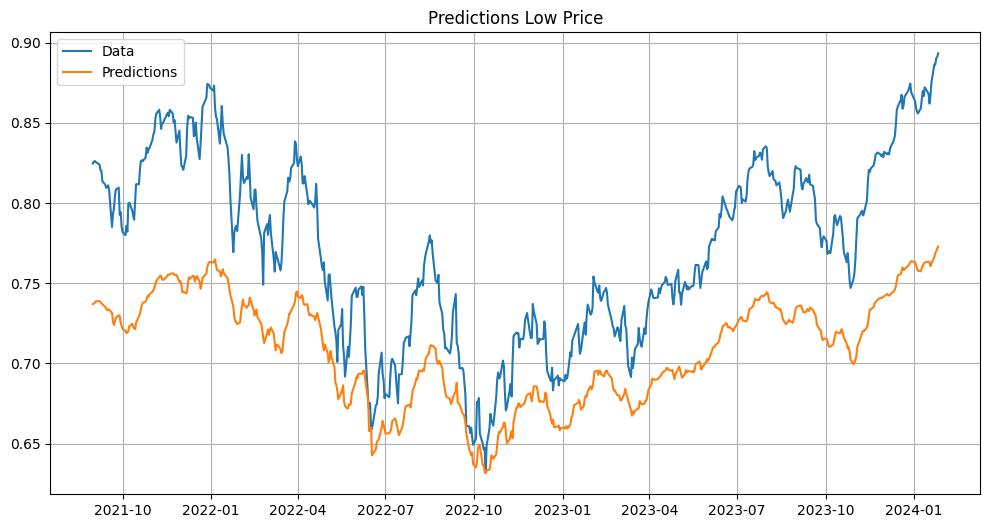

In [20]:
plt = config_chart('Predictions Low Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 2])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 2])
plt.legend(['Data', 'Predictions'])

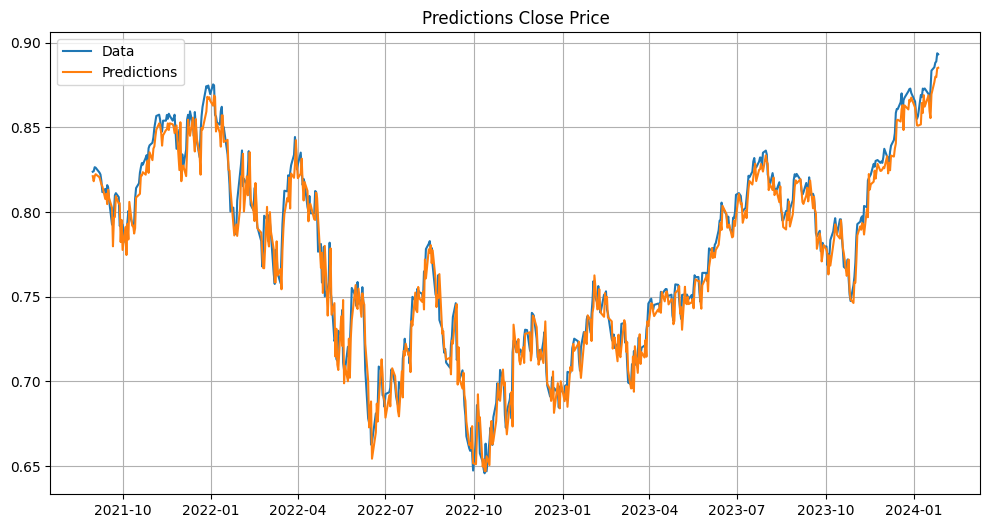

In [21]:
plt = config_chart('Predictions Close Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 3])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 3])
plt.legend(['Data', 'Predictions'])

In [23]:

predictions = model.predict(x_predict)

19/19 [==============================] - 0s 3ms/step


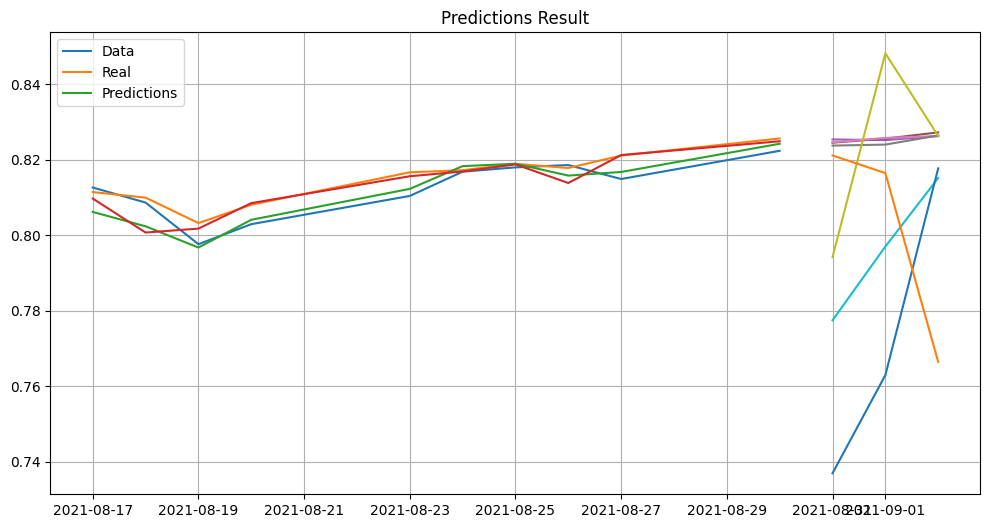

In [22]:
index = 0

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index, : ])
plt.plot(y_dates_predict[index], y_predict[index, :])
plt.plot(y_dates_predict[index], predictions[index, :])
plt.legend(['Data', 'Real', 'Predictions'])